In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter


%matplotlib inline

#increase plot size
plt.rcParams['figure.figsize'] = [20, 10]

import numpy as np
# maximum print option
np.set_printoptions(linewidth=400)

from model import Schelling

yellow = (237, 215, 79)
yellow = tuple([val / 255 for val in yellow])  # Normalize to range [0, 1]

red = (177,39,28)
red = tuple([val / 255 for val in red])  # Normalize to range [0, 1]

In [2]:
SAVEFIG = False

In [3]:
model = Schelling(width = 50, height = 50, density = 0.80, minority_pc = 0.4, homophily = 3,  policy = 'random', follow_policy=1, seed = 1995)


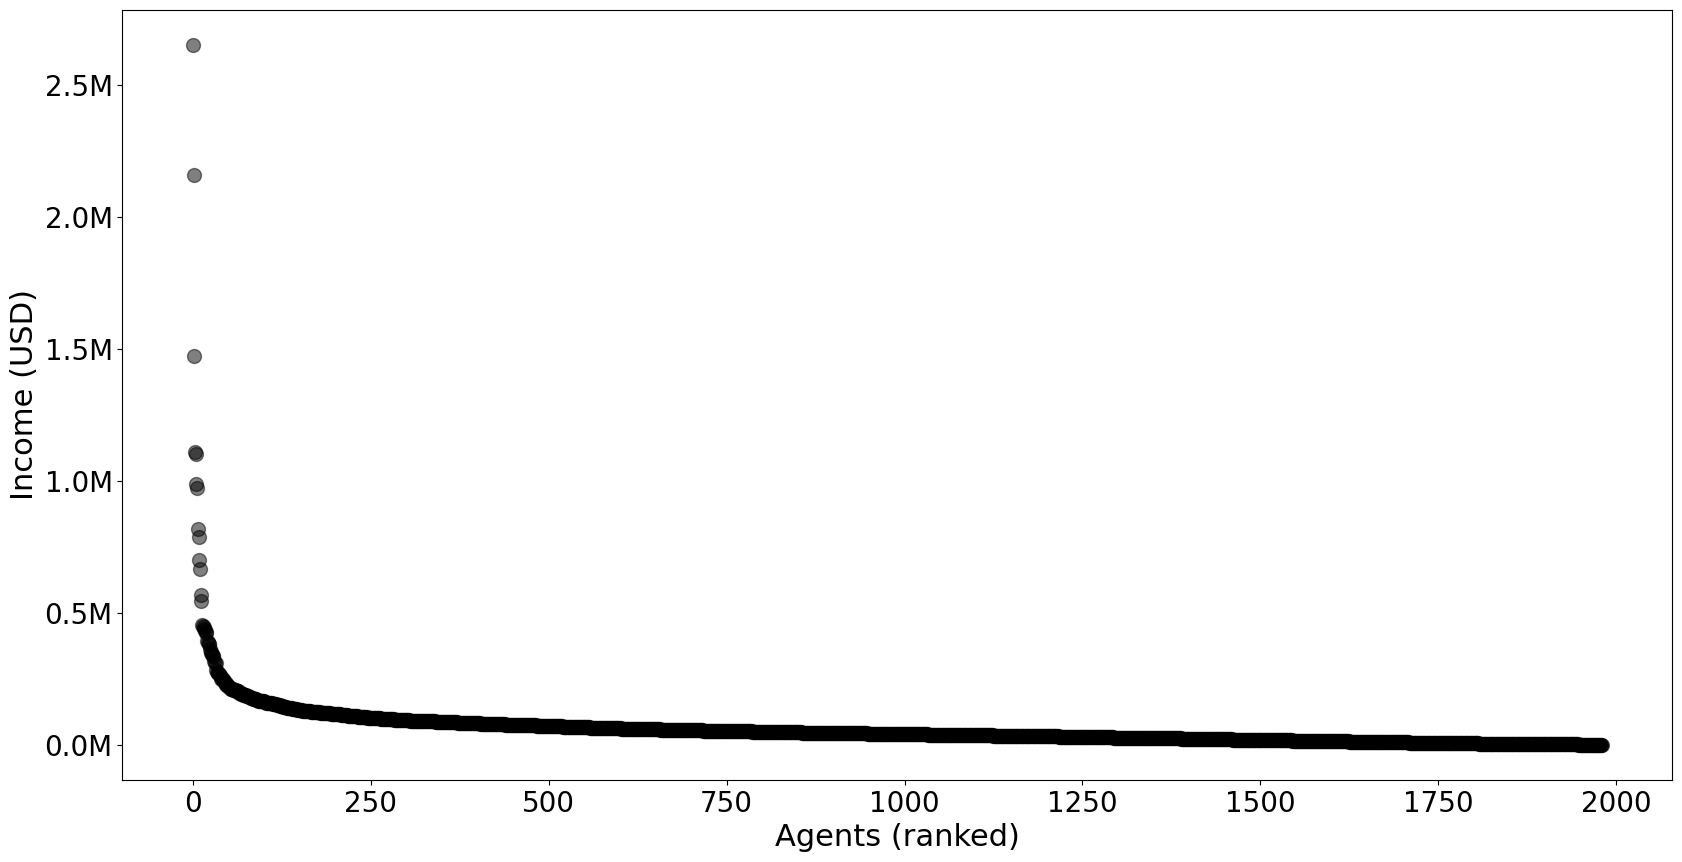

In [4]:

#plot an histogram of the incomes of the agents

incomes = [agent.income for agent in model.schedule.agents]


incomes = sorted(incomes, reverse=True)

def millions_formatter(x, pos):
    return f'{x / 1000000}M'

fig, ax = plt.subplots()
#plot a with points with
plt.plot(incomes, 'o', markersize=10, alpha=0.5, color='black')

plt.xlabel("Agents (ranked)", fontsize=22)
plt.ylabel("Income (USD)", fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#loglog plot
#plt.loglog()

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


if SAVEFIG:
    plt.savefig("plots/income.pdf", bbox_inches="tight")



In [5]:
model = Schelling(width = 25, height = 25, density = 0.80, minority_pc = 0.4, homophily = 3,  policy = 'random', follow_policy=1, seed = 1995)


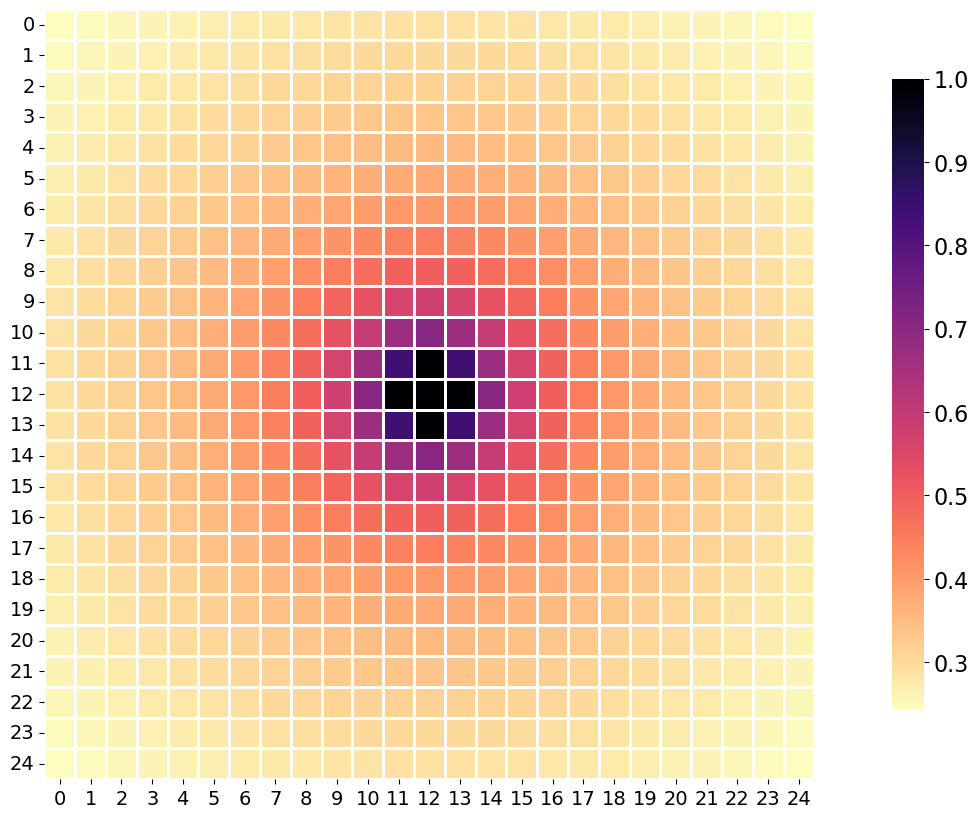

In [6]:
# Import the necessary modules
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap of the relevance matrix
sns.heatmap(model.relevance_matrix, cmap="magma_r", square=True, cbar_kws={"shrink": .82}, linewidths=1, linecolor='white', xticklabels=True, yticklabels=True, cbar=True)

# Rotate the x-axis and y-axis labels
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(rotation='horizontal', fontsize = 14)

#increase cbar tick size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=16)


if SAVEFIG:
    plt.savefig("plots/relevance_matrix.pdf", bbox_inches="tight")


In [7]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps)  # Show how many steps have actually run

start_occupancy = model.cell_occupancy_matrix_array[0]  #1 are minority, 0 are majority, -1 are empty
end_occupancy = model.cell_occupancy_matrix_array[model.schedule.steps] 

50


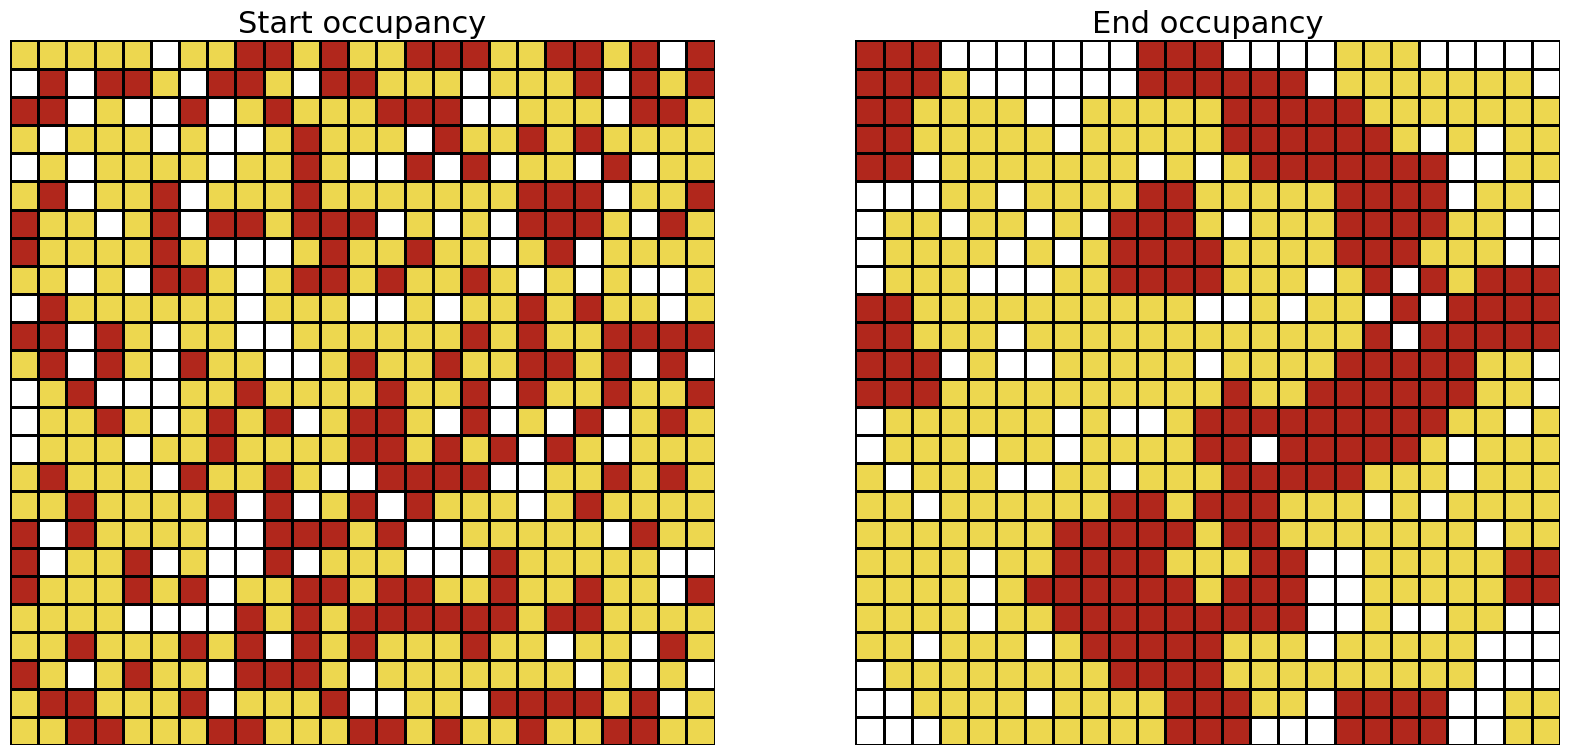

In [8]:
#realize two subplots, one for the start occupancy and one for the end occupancy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title("Start occupancy", fontsize=22)
ax2.set_title("End occupancy", fontsize=22)

#with seaborn realize an heatmap of the occupancy matrix. Divide cells with a white line

yellow = (237, 215, 79)
yellow = tuple([val / 255 for val in yellow])  # Normalize to range [0, 1]

red = (177,39,28)
red = tuple([val / 255 for val in red])  # Normalize to range [0, 1]

colors = ['white', yellow, red]  # Colors for -1, 0, 1 respectively
cmap = ListedColormap(colors)

sns.heatmap(start_occupancy, cmap=cmap, ax=ax1, square=True, cbar=False, linewidths=1, linecolor="black", xticklabels=False, yticklabels=False)
sns.heatmap(end_occupancy,   cmap=cmap, ax=ax2, square=True, cbar=False, linewidths=1, linecolor="black", xticklabels=False, yticklabels=False)

if SAVEFIG:
    plt.savefig("plots/occupancy.pdf", bbox_inches='tight')

In [9]:
results_df = pd.read_csv("results.csv")

In [10]:
results_df = results_df[["RunId", "iteration", "Step", "follow_policy", "policy",  "segregation"]]
#calculate the average Step and the average segregation, across different iteration and policy
results_df_g = results_df.groupby(['policy', 'follow_policy']).mean().reset_index()
results_df_g.head(20)

,policy,follow_policy,RunId,iteration,Step,segregation
0,different_neighborhood,0.0,3322.0,49.5,26.89,0.661358
1,different_neighborhood,0.1,3323.0,49.5,100.00,0.656786
2,different_neighborhood,0.2,3324.0,49.5,100.00,0.658769
3,different_neighborhood,0.3,3325.0,49.5,100.00,0.660080
4,different_neighborhood,0.4,3326.0,49.5,100.00,0.663667
5,different_neighborhood,0.5,3327.0,49.5,100.00,0.664441
6,different_neighborhood,0.6,3328.0,49.5,100.00,0.671286
7,different_neighborhood,0.7,3329.0,49.5,100.00,0.673369
8,different_neighborhood,0.8,3330.0,49.5,100.00,0.678113
9,different_neighborhood,0.9,3331.0,49.5,100.00,0.681973


In [11]:
#per each policy, extract the timeseries of Step and segregation
results_df_g_step = results_df_g.pivot(index='follow_policy', columns='policy', values='Step')
results_df_g_segregation = results_df_g.pivot(index='follow_policy', columns='policy', values='segregation')


In [12]:
results_df_g_step

policy,different_neighborhood,distance_relevance,minimum_improvement,random,recently_emptied,similar_neighborhood
follow_policy,,,,,,
0.0,26.89,26.15,26.65,26.00,27.35,26.75
0.1,100.00,60.79,26.98,27.62,98.42,26.18
0.2,100.00,69.36,26.43,26.45,100.00,27.86
0.3,100.00,74.09,27.23,27.87,100.00,26.24
0.4,100.00,76.37,27.11,27.93,100.00,27.43
0.5,100.00,80.28,26.99,25.60,100.00,26.27
0.6,100.00,78.90,22.93,27.85,100.00,26.74
0.7,100.00,85.19,21.11,27.60,100.00,26.53
0.8,100.00,80.61,18.29,26.63,100.00,24.64


In [13]:
policy_dict = {}
num_categories = 20
# Generating colors using the 'tab20' colormap from Matplotlib
colors = [plt.cm.tab20b(i) for i in np.linspace(0, 1, num_categories)]

colors[1]

(0.4196078431372549, 0.6823529411764706, 0.8392156862745098, 1.0)

In [21]:
policy_dict["similar_neighborhood"] = colors[0]
policy_dict["different_neighborhood"] = colors[1]
policy_dict["minimum_improvement"]  = colors[4]
policy_dict["recently_emptied"] = colors[8]
policy_dict["distance_relevance"] = colors[12]


In [27]:
policy_order = ["similar_neighborhood", "different_neighborhood", "minimum_improvement", "recently_emptied", "distance_relevance", "random"]

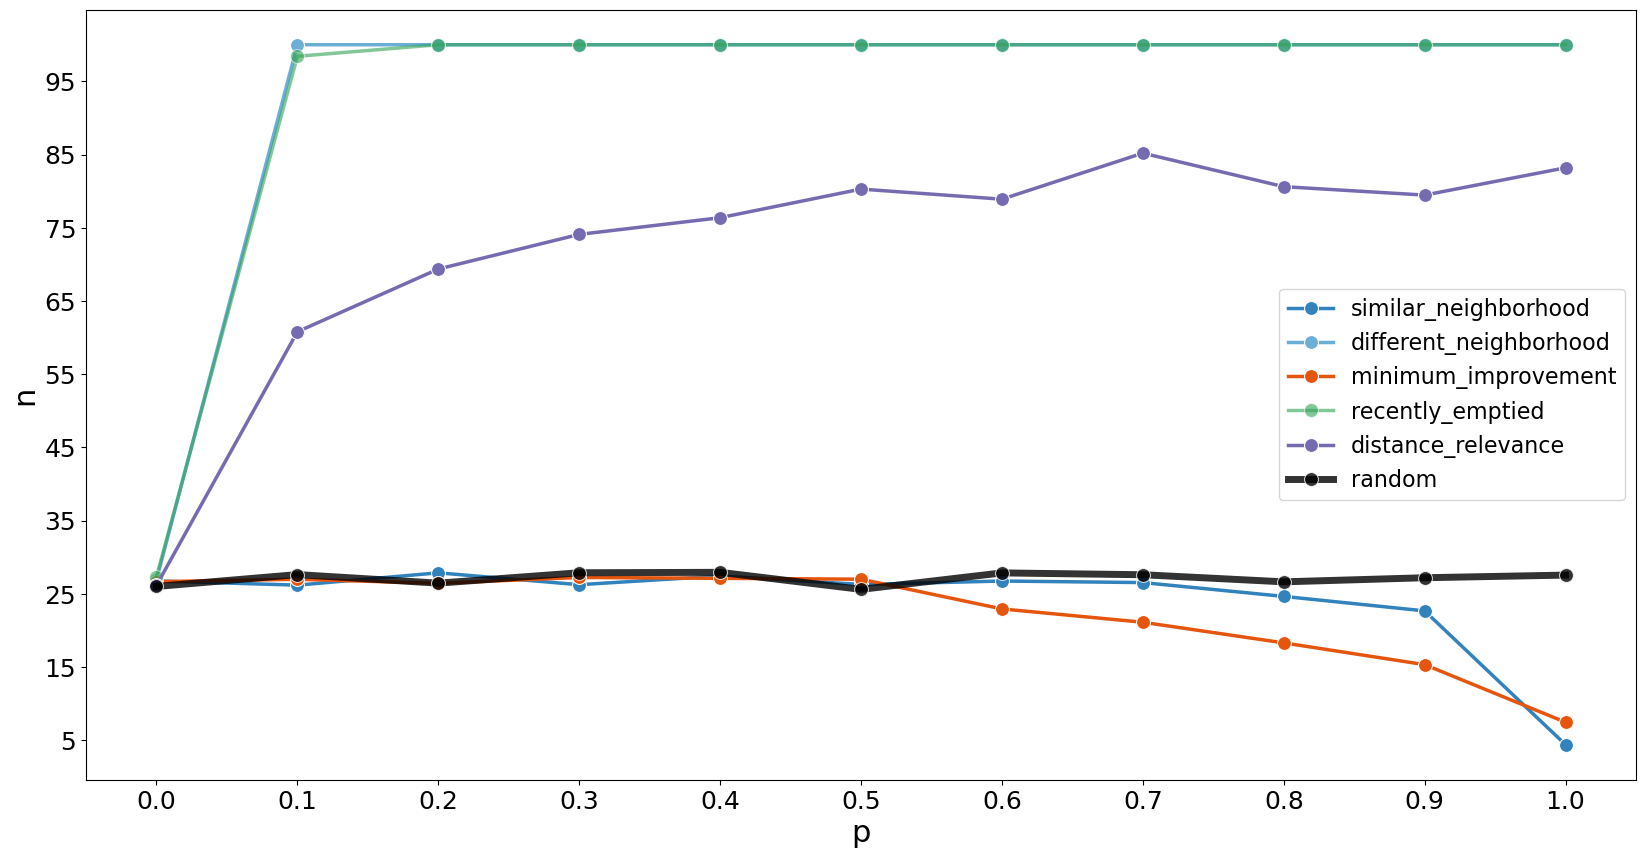

In [28]:
# do the same with a for loo


for policy in policy_order:
    if policy == 'random':
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label=policy, linewidth=5,
                           marker="o", markersize = 10,  color="black", alpha=0.8)
        
        
    elif policy == "minimum_improvement":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label=policy, linewidth=2.5, 
                          marker="o", markersize = 10,  color=policy_dict[policy])
        
    elif policy == "similar_neighborhood":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label=policy, linewidth=2.5, 
                          marker="o", markersize = 10,color=policy_dict[policy])
        
    elif policy == "different_neighborhood":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label=policy, linewidth=2.5, 
                           marker="o", markersize = 10, color=policy_dict[policy])

    elif policy == "recently_emptied":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label=policy, linewidth=2.5, 
                          marker="o", markersize = 10, color=policy_dict[policy], alpha = 0.6)
        
    elif policy == "distance_relevance":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="Step", label=policy, linewidth=2.5, 
                          marker="o", markersize = 10, color=policy_dict[policy])

ax.set_xlabel("p", fontsize=22)
ax.set_ylabel("n", fontsize=22)   
ax.tick_params(labelsize=18)
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(5, 100.1, 10))
ax.legend(fontsize=16)


if SAVEFIG:
    plt.savefig("plots/average_steps.pdf", bbox_inches='tight')


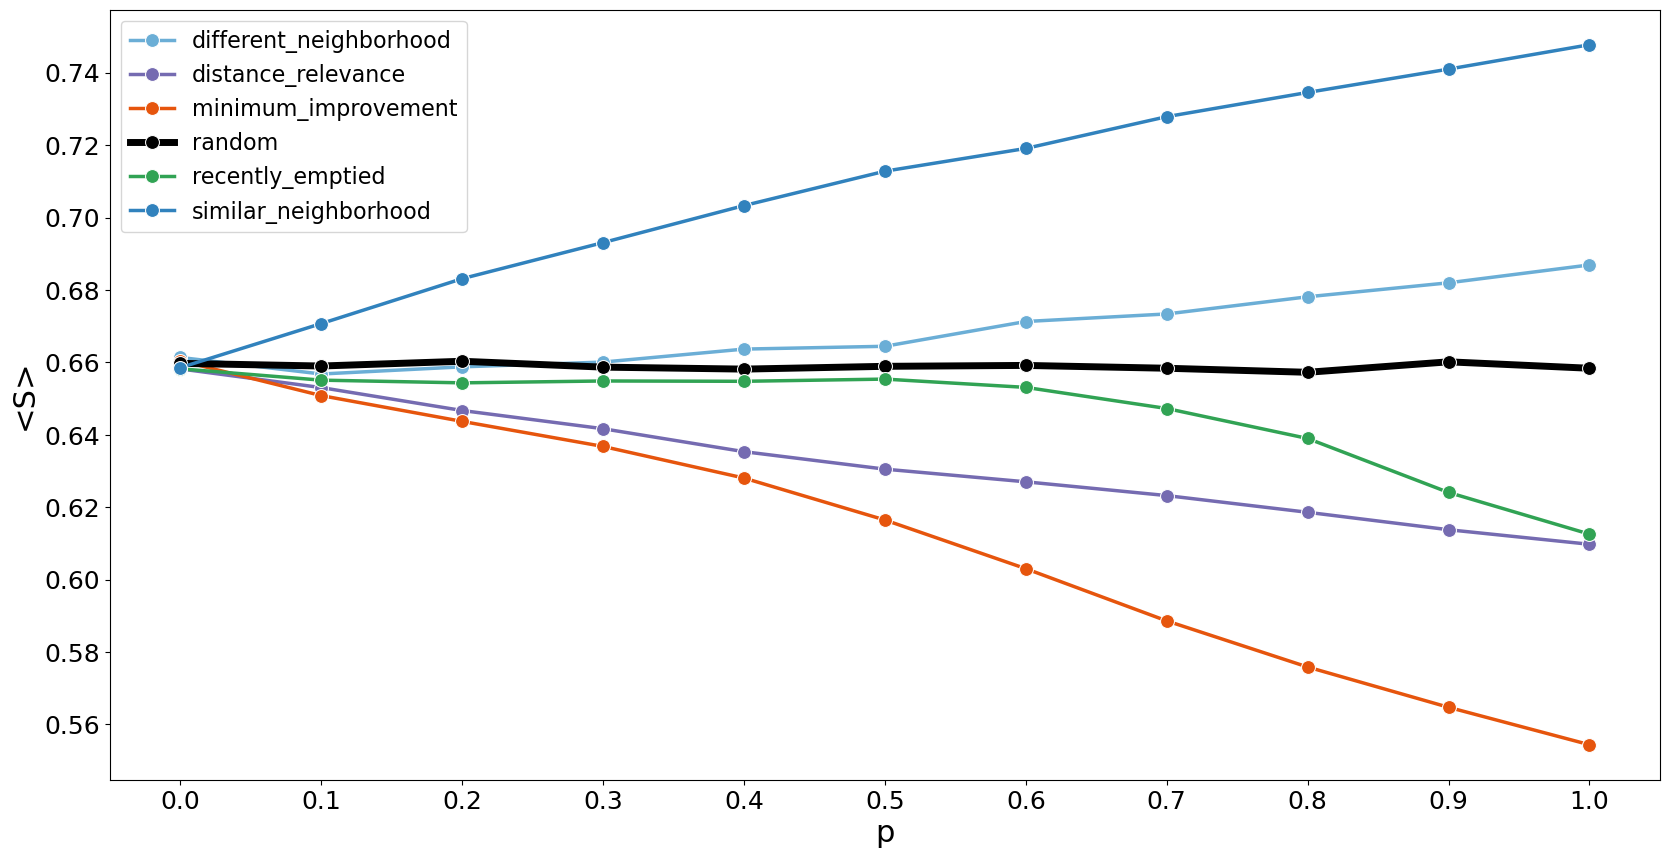

In [16]:
#plot the timeseries of segregation, using seaborn, with grid every 0.1 on x axis and with line and points. The random policy must be thicker than the others as above



for policy in policy_order:
    if policy == 'random':
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label=policy, linewidth=5,
                           marker="o", markersize = 10, dashes=False, color="black")
        
    elif policy == "maximum_improvement":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label=policy, linewidth=2.5, 
                          marker="o", markersize = 10, dashes=False, color=policy_dict[policy])
        
    elif policy == "minimum_improvement":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label=policy, linewidth=2.5, 
                          marker="o", markersize = 10, color=policy_dict[policy])
        
    elif policy == "similar_neighborhood":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label=policy, linewidth=2.5, 
                          marker="o", markersize = 10, dashes=False, color=policy_dict[policy])
    
    elif policy == "different_neighborhood":
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label=policy, linewidth=2.5, 
                           marker="o", markersize = 10,  color=policy_dict[policy])

    else:
        ax = sns.lineplot(data=results_df_g[results_df_g.policy == policy], x="follow_policy", y="segregation", label=policy, linewidth=2.5, marker="o", markersize = 10, dashes=False, 
                          color=policy_dict[policy])
        
ax.set_xlabel("p", fontsize=22)
ax.set_ylabel("<S>", fontsize=22)   
ax.tick_params(labelsize=18)
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0.56, 0.741, 0.02))
ax.legend(fontsize=16)

if True:
    plt.savefig("plots/average_segregation.pdf", bbox_inches='tight')